<a href="https://colab.research.google.com/github/codewithharsha/DeepLearning/blob/main/DeepLearningPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digit Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


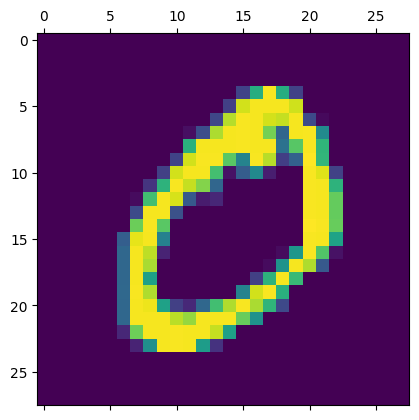

In [6]:
plt.matshow(x_train[1])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [24]:
x_train_flat.shape
y_train.shape

(60000,)

In [19]:
#building model
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

In [26]:
model.compile(loss=["sparse_categorical_crossentropy"],metrics=["accuracy"])

In [27]:
model.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4430 - accuracy: 0.8813
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3045 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2901 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2845 - accuracy: 0.9223
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2801 - accuracy: 0.9244
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2753 - accuracy: 0.9269
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2739 - accuracy: 0.9276
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9285
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.271

In [30]:
pred = model.predict(x_test_flat)

313/313 [==============================] - 0s 1ms/step


In [ ]:
plt.plot(h)

Text(0.5, 1.0, 'Predicted label 7')

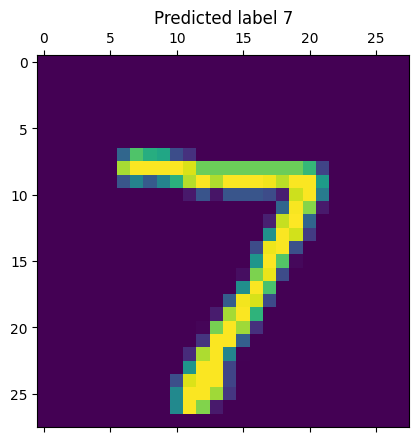

In [39]:
plt.matshow(x_test[0])
plt.title("Predicted label "+str(np.argmax(pred[0])))

In [43]:
pred = model.predict(np.expand_dims(x_test_flat[0],axis=0))

1/1 [==============================] - 0s 90ms/step


In [44]:
np.argmax(pred)

7

## Image Classification

In [45]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [48]:
x_train = x_train/255
x_test = x_test/255

In [51]:
model = keras.Sequential([
    keras.layers.Conv2D(32,input_shape=(32,32,3),activation="relu",kernel_size=(3,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

In [56]:
model.compile(optimizer="adam",loss=["sparse_categorical_crossentropy"],metrics=["accuracy"])

In [57]:
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4174 - accuracy: 0.4910 - val_loss: 1.1791 - val_accuracy: 0.5853
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0514 - accuracy: 0.6313 - val_loss: 1.1069 - val_accuracy: 0.6133
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9176 - accuracy: 0.6781 - val_loss: 0.9322 - val_accuracy: 0.6767
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8230 - accuracy: 0.7128 - val_loss: 0.9183 - val_accuracy: 0.6828
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7426 - accuracy: 0.7394 - val_loss: 0.8737 - val_accuracy: 0.7004
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6738 - accuracy: 0.7653 - val_loss: 0.9083 - val_accuracy: 0.6973
Epoch 7/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.6050 - accuracy: 0.7890 - val_loss: 0.8852 -

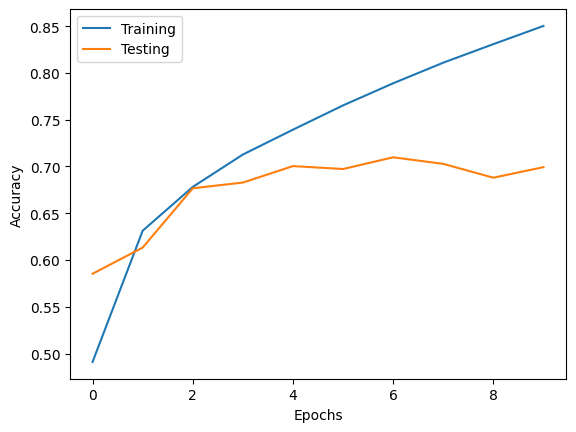

In [62]:
plt.plot(hist.history["accuracy"],label="Training")
plt.plot(hist.history["val_accuracy"],label="Testing")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

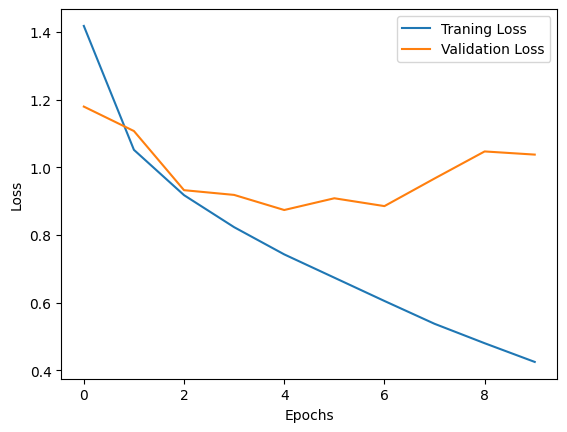

In [64]:
plt.plot(hist.history["loss"],label="Traning Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [71]:
pred = model.predict(x_test)

313/313 [==============================] - 6s 20ms/step


Text(0.5, 1.0, '3')

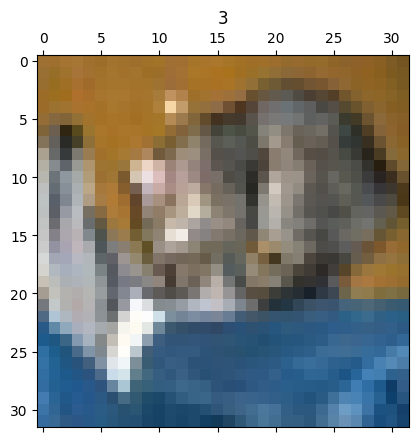

In [70]:
# plt.matshow(x_test[0])
# plt.title(np.argmax(pred))

In [75]:
y_pred = [np.argmax(i) for i in pred]

In [76]:
cm = tf.math.confusion_matrix(y_test,y_pred)

In [77]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[698,  24,  94,  26,  16,   8,   4,  11,  79,  40],
       [ 13, 840,  10,   8,   5,   5,   9,   5,  22,  83],
       [ 57,   9, 649,  64,  50,  67,  40,  49,   9,   6],
       [ 14,   7,  88, 521,  55, 191,  42,  56,   7,  19],
       [ 13,   5, 143,  64, 571,  59,  36,  93,  10,   6],
       [ 12,   5,  84, 147,  29, 618,   8,  77,   8,  12],
       [  6,   6,  67,  76,  33,  26, 763,  12,   4,   7],
       [ 15,   5,  35,  31,  40,  58,   6, 791,   3,  16],
       [ 52,  50,  35,  19,  13,  11,   1,  13, 778,  28],
       [ 23, 101,  20,  16,  13,   7,   6,  24,  26, 764]], dtype=int32)>

<Axes: >

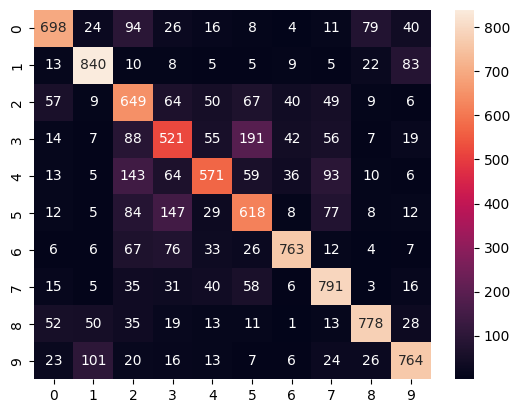

In [80]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

## **CATS VS DOGS**

In [81]:
!wget https://drive.google.com/file/d/1tWqTvMn5-yxrnUhY2szUOw2XyzXQWjxc/view

--2024-03-25 15:15:40--  https://drive.google.com/file/d/1tWqTvMn5-yxrnUhY2szUOw2XyzXQWjxc/view
Resolving drive.google.com (drive.google.com)... 142.250.65.110, 2607:f8b0:4025:804::200e
Connecting to drive.google.com (drive.google.com)|142.250.65.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view’

view                    [ <=>                ]  82.87K  --.-KB/s    in 0.02s   

2024-03-25 15:15:40 (4.15 MB/s) - ‘view’ saved [84858]



In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [97]:
#loading data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [98]:
train_data = train_datagen.flow_from_directory(
    "/content/train",
    target_size=(256,256),
    class_mode="binary",
    batch_size = 32
)

Found 557 images belonging to 2 classes.


In [100]:
test_data = test_datagen.flow_from_directory(
    "/content/test",
    batch_size=32,
    target_size=(256,256),
    class_mode = "binary"
)

Found 140 images belonging to 2 classes.


In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

In [109]:
model.compile(optimizer="adam",loss=["binary_crossentropy"],metrics="accuracy")

In [110]:
hist = model.fit(train_data,validation_data = test_data,epochs=2)

Epoch 1/2
18/18 [==============================] - 97s 5s/step - loss: 1.0958 - accuracy: 0.4829 - val_loss: 0.6914 - val_accuracy: 0.5214
Epoch 2/2
18/18 [==============================] - 87s 5s/step - loss: 0.6891 - accuracy: 0.5476 - val_loss: 0.6950 - val_accuracy: 0.5000


In [120]:
img = tf.keras.preprocessing.image.load_img("/content/test/dogs/dog_124.jpg",target_size=(256,256))
img = tf.keras.preprocessing.image.img_to_array(img)
img1 = img/255
img = np.expand_dims(img1,axis=0)

In [117]:
pred = model.predict(img)

1/1 [==============================] - 0s 55ms/step


In [118]:
pred

array([[0.5532557]], dtype=float32)

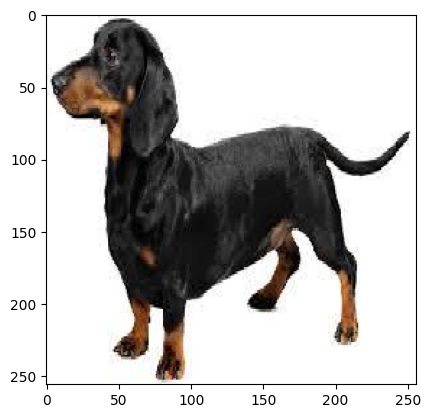

In [121]:
plt.imshow(img1)

## Word2Vec Model

In [1]:
import gensim
import pandas as pd
import re
import numpy as np
from gensim.models import word2vec,FastText

In [2]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

--2024-03-25 17:57:19--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45409631 (43M) [application/x-gzip]
Saving to: ‘reviews_Cell_Phones_and_Accessories_5.json.gz’

reviews_Cell_Phones 100%[===================>]  43.31M  12.0MB/s    in 4.9s    

2024-03-25 17:57:24 (8.76 MB/s) - ‘reviews_Cell_Phones_and_Accessories_5.json.gz’ saved [45409631/45409631]



In [3]:
!gunzip /content/reviews_Cell_Phones_and_Accessories_5.json.gz

In [4]:
df = pd.read_json("/content/reviews_Cell_Phones_and_Accessories_5.json",lines=True)

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [6]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [7]:
#pre processing and tokenizing the data
review_data = df.reviewText.apply(gensim.utils.simple_preprocess)

In [8]:
#building the model
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)

In [ ]:
model.build_vocab(review_data,progress_per=1000)

In [11]:
model.train(review_data,total_examples=model.corpus_count,epochs=5)

(61509766, 83868975)

In [17]:
model.wv.most_similar("value")

[('bargain', 0.6734563112258911),
 ('pricing', 0.6274416446685791),
 ('performer', 0.5805121064186096),
 ('price', 0.5795320868492126),
 ('choice', 0.5604948997497559),
 ('bang', 0.5597917437553406),
 ('deals', 0.5253738760948181),
 ('buck', 0.5246098041534424),
 ('msrp', 0.5012509822845459),
 ('investment', 0.49694299697875977)]

## **Spam Mail Predction**

In [31]:
!wget https://raw.githubusercontent.com/Gopikanth123/sms-spam-prediction/main/spam.csv

--2024-03-25 19:01:25--  https://raw.githubusercontent.com/Gopikanth123/sms-spam-prediction/main/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2024-03-25 19:01:26 (12.9 MB/s) - ‘spam.csv’ saved [503663/503663]



In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [34]:
df = pd.read_csv("/content/spam.csv",encoding="latin-1")

In [35]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True,axis=1)

In [38]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
y = df.v1
x = df.v2

In [49]:
enc = LabelEncoder()
y_encoded = enc.fit_transform(y)
print(y_encoded)

[0 0 1 ... 0 0 0]


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size=0.2)

In [56]:
#pre processing textual data
max_words = 1000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)

In [61]:
sequence_matrix = tf.keras.utils.pad_sequences(sequences,maxlen=max_len)

In [65]:
model = tf.keras.Sequential([
    Embedding(input_dim=max_words,input_length=max_len,output_dim=50),
    LSTM(64),
    Dense(256,activation="relu"),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])

In [66]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [67]:
model.fit(sequence_matrix,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
112/112 [==============================] - 20s 133ms/step - loss: 0.2239 - accuracy: 0.9201 - val_loss: 0.0542 - val_accuracy: 0.9787
Epoch 2/5
112/112 [==============================] - 13s 118ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0420 - val_accuracy: 0.9865
Epoch 3/5
112/112 [==============================] - 7s 62ms/step - loss: 0.0250 - accuracy: 0.9938 - val_loss: 0.0400 - val_accuracy: 0.9888
Epoch 4/5
112/112 [==============================] - 9s 82ms/step - loss: 0.0158 - accuracy: 0.9961 - val_loss: 0.0374 - val_accuracy: 0.9910
Epoch 5/5
112/112 [==============================] - 7s 65ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0588 - val_accuracy: 0.9865


In [79]:
#evaluting on test data
test_sequences = tok.texts_to_sequences(x_test)
test_seq_mat = tf.keras.utils.pad_sequences(test_sequences,maxlen=max_len)

In [82]:
import numpy as np
val = np.expand_dims(test_seq_mat[0],axis = 0)
model.predict(val)

1/1 [==============================] - 0s 38ms/step


array([[1.7026177e-05]], dtype=float32)

In [83]:
acc = model.evaluate(test_seq_mat,y_test)

35/35 [==============================] - 1s 29ms/step - loss: 0.0906 - accuracy: 0.9830


In [84]:
print("Loss",acc[0])
print("Accuracy",acc[1])

Loss 0.09059587121009827
Accuracy 0.9829596281051636


## Gradient Descent

In [85]:
import numpy as np
import tensorflow as tf

In [88]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.9)
var = tf.Variable(0.5)
cost = lambda: 2+var**2

In [ ]:
x = []
y = []
for _ in range(10):
  sgd.minimize()